In [1]:
#Import the Libraries

#For numerical libraries
import numpy as np

#To handle data in the form of rows and columns
import pandas as pd

#importing seaborn for statistical plots
import seaborn as sns

#importing ploting libraries
import matplotlib.pyplot as plt

#styling figures
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)

#To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing the Encoding library
from sklearn.preprocessing import LabelEncoder

#Import SMOTE library for handling imbalance class
from imblearn.over_sampling import SMOTE

#Import Decision Tree Classifier machine learning Library
from sklearn.tree import DecisionTreeClassifier

# Import Logistic Regression machine learning library
from sklearn.linear_model import LogisticRegression 

#Import Naive Bayes' machine learning Library
from sklearn.naive_bayes import GaussianNB

#Import Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

#Import the metrics
from sklearn import metrics

#Import the Voting classifier for Ensemble
from sklearn.ensemble import VotingClassifier


#  Load the dataset

In [2]:
#reading the CSV file into pandas dataframe
bank_data=pd.read_csv(r"C:\Users\karulrax\OneDrive - Intel Corporation\Documents\karthick\Learning\Hackothon\28may2021\train.csv")

In [3]:
#Check top few records of the dataset
bank_data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
#To show the detailed summary 
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [5]:
#fill na with others
bank_data.fillna("Others", inplace=True)

In [6]:
#change object datatypes to category except id 
bank_data['Gender']=bank_data.Gender.astype('category')
bank_data['Region_Code']=bank_data.Region_Code.astype('category')
bank_data['Occupation']=bank_data.Occupation.astype('category')
bank_data['Channel_Code']=bank_data.Channel_Code.astype('category')
bank_data['Credit_Product']=bank_data.Credit_Product.astype('category')
bank_data['Is_Active']=bank_data.Is_Active.astype('category')
bank_data.dtypes

ID                       object
Gender                 category
Age                       int64
Region_Code            category
Occupation             category
Channel_Code           category
Vintage                   int64
Credit_Product         category
Avg_Account_Balance       int64
Is_Active              category
Is_Lead                   int64
dtype: object

In [7]:
#To get the shape 
bank_data.shape

(245725, 11)

# Exploratory data quality report

## Univariate analysis

In [8]:
#To get the number of columns
bank_data.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [9]:
#Analyze the distribution of the dataset
bank_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,245725.0,4.385631e+01,14.828672,23.0,30.0,43.0,54.0,85.0
Vintage,245725.0,4.695914e+01,32.353136,7.0,20.0,32.0,73.0,135.0
Avg_Account_Balance,245725.0,1.128403e+06,852936.356069,20790.0,604310.0,894601.0,1366666.0,10352009.0
Is_Lead,245725.0,2.372083e-01,0.425372,0.0,0.0,0.0,0.0,1.0


## Description of independent attribute

### Age

In [10]:
print('Minimum age: ', bank_data['Age'].min())
print('Maximum age: ',bank_data['Age'].max())
print('Mean value: ', bank_data['Age'].mean())
print('Median value: ',bank_data['Age'].median())
print('Standard deviation: ', bank_data['Age'].std())
print('Null values: ',bank_data['Age'].isnull().any())

Minimum age:  23
Maximum age:  85
Mean value:  43.85630684708516
Median value:  43.0
Standard deviation:  14.8286718046486
Null values:  False


In [11]:
Q1=bank_data['Age'].quantile(q=0.25)
Q3=bank_data['Age'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)

1st Quartile (Q1) is:  30.0
3st Quartile (Q3) is:  54.0


In [12]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Ages: ', L_outliers)
print('Upper outliers in Ages: ', U_outliers)

Lower outliers in Ages:  -6.0
Upper outliers in Ages:  90.0


In [13]:
print('Number of outliers in Age upper : ', bank_data[bank_data['Age']>90]['Age'].count())
print('Number of outliers in Age lower : ', bank_data[bank_data['Age']<0]['Age'].count())
print('% of Outlier in Age upper: ',round(bank_data[bank_data['Age']>90]['Age'].count()*100/len(bank_data)), '%')
print('% of Outlier in Age lower: ',round(bank_data[bank_data['Age']<0]['Age'].count()*100/len(bank_data)), '%')

Number of outliers in Age upper :  0
Number of outliers in Age lower :  0
% of Outlier in Age upper:  0 %
% of Outlier in Age lower:  0 %


C:\Users\karulrax\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\karulrax\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


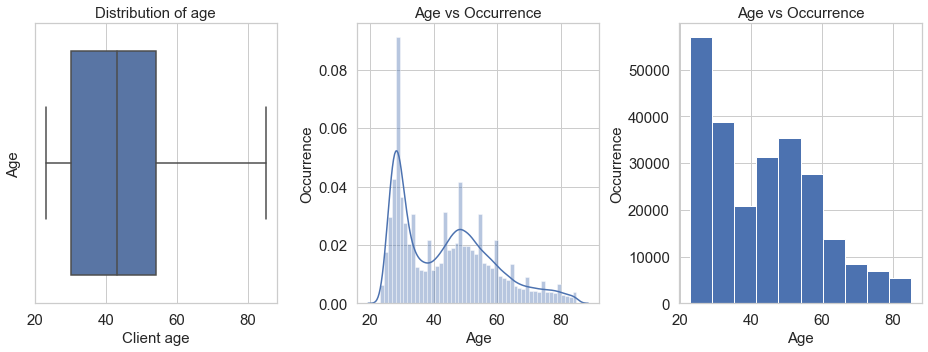

In [14]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='Age',data=bank_data,orient='v',ax=ax1)
ax1.set_xlabel('Client age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Distribution of age', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(bank_data['Age'],ax=ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Age vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(bank_data['Age'])
ax3.set_xlabel('Age', fontsize=15)
ax3.set_ylabel('Occurrence', fontsize=15)
ax3.set_title('Age vs Occurrence', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

### Occupation

In [15]:
print('Jobs: \n', bank_data['Occupation'].unique())

Jobs: 
 ['Other', 'Salaried', 'Self_Employed', 'Entrepreneur']
Categories (4, object): ['Other', 'Salaried', 'Self_Employed', 'Entrepreneur']


In [16]:
bank_data.groupby('Occupation').size()

Occupation
Entrepreneur       2667
Other             70173
Salaried          71999
Self_Employed    100886
dtype: int64

C:\Users\karulrax\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


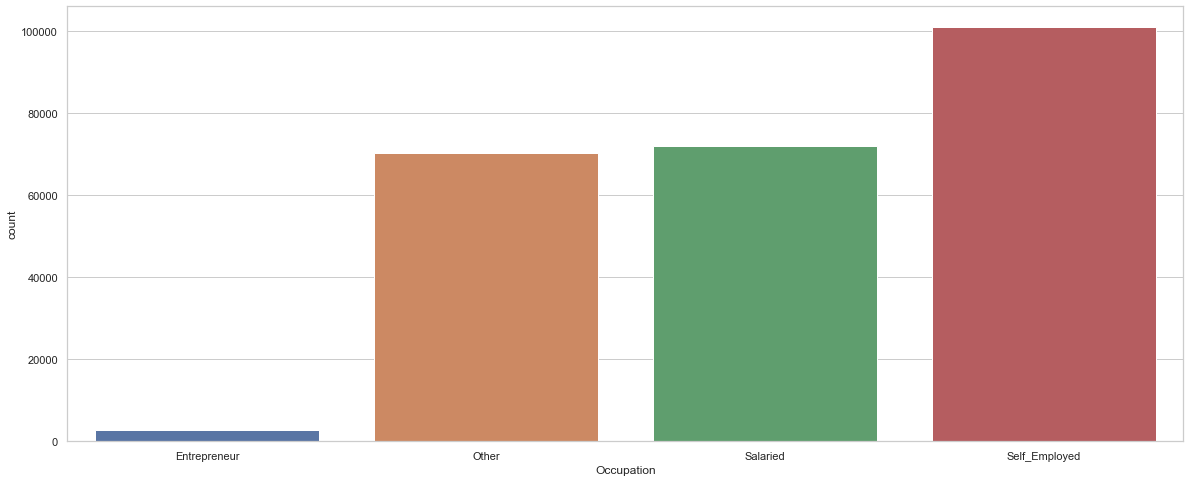

In [17]:
fig, ax=plt.subplots()
fig.set_size_inches(20,8)

#countplot
sns.countplot(bank_data['Occupation'],data=bank_data)
ax1.set_xlabel('Job', fontsize=18)
ax1.set_ylabel('Count', fontsize=18)
ax1.set_title('Job vs Count', fontsize=18)
ax1.tick_params(labelsize=20)

### Gender

In [18]:
print('gender: \n', bank_data['Gender'].unique())

gender: 
 ['Female', 'Male']
Categories (2, object): ['Female', 'Male']


In [19]:
bank_data.groupby('Gender').size()

Gender
Female    111528
Male      134197
dtype: int64

C:\Users\karulrax\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


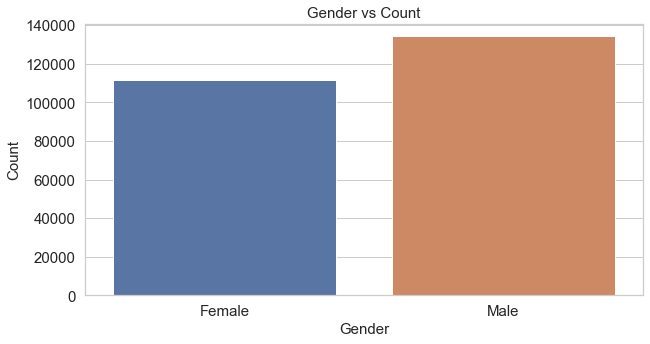

In [20]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(bank_data['Gender'],data=bank_data)
ax.set_xlabel('Gender', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Gender vs Count', fontsize=15)
ax.tick_params(labelsize=15)

### Credit_Product

In [21]:
print('Credit_Product: \n', bank_data['Credit_Product'].unique())


Credit_Product: 
 ['No', 'Others', 'Yes']
Categories (3, object): ['No', 'Others', 'Yes']


In [22]:
bank_data.groupby('Credit_Product').size()

Credit_Product
No        144357
Others     29325
Yes        72043
dtype: int64

C:\Users\karulrax\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


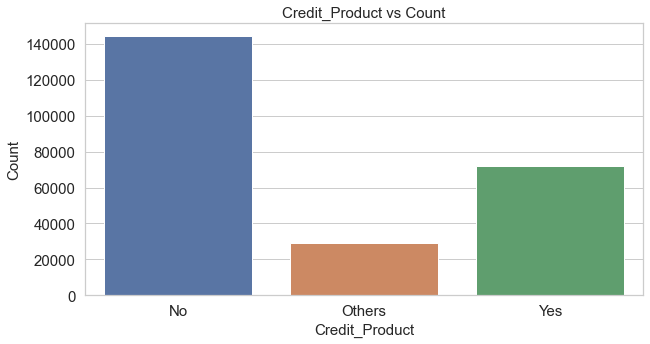

In [23]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(bank_data['Credit_Product'],data=bank_data)
ax.set_xlabel('Credit_Product', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Credit_Product vs Count', fontsize=15)
ax.tick_params(labelsize=15)

### Avg_Account_Balance

In [24]:

print('Minimum balance: ', bank_data['Avg_Account_Balance'].min())
print('Maximum balance: ',bank_data['Avg_Account_Balance'].max())
print('Mean value: ', bank_data['Avg_Account_Balance'].mean())
print('Median value: ',bank_data['Avg_Account_Balance'].median())
print('Standard deviation: ', bank_data['Avg_Account_Balance'].std())
print('Null values: ',bank_data['Avg_Account_Balance'].isnull().any())

Minimum balance:  20790
Maximum balance:  10352009
Mean value:  1128403.1010194323
Median value:  894601.0
Standard deviation:  852936.3560692865
Null values:  False


In [25]:
from scipy.stats import zscore

bank_data[['Avg_Account_Balance']].mean()
bank_data[['Avg_Account_Balance']].mean()

bank_data['balance_outliers'] = bank_data['Avg_Account_Balance']
bank_data['balance_outliers']= zscore(bank_data['balance_outliers'])

condition1 = (bank_data['balance_outliers']>3) | (bank_data['balance_outliers']<-3 )
bank_data = bank_data.drop(bank_data[condition1].index, axis = 0, inplace = False)

In [26]:
bank_data = bank_data.drop('balance_outliers', axis=1)

In [27]:
print('Minimum balance: ', bank_data['Avg_Account_Balance'].min())
print('Maximum balance: ',bank_data['Avg_Account_Balance'].max())
print('Mean value: ', bank_data['Avg_Account_Balance'].mean())
print('Median value: ',bank_data['Avg_Account_Balance'].median())
print('Standard deviation: ', bank_data['Avg_Account_Balance'].std())
print('Null values: ',bank_data['Avg_Account_Balance'].isnull().any())

Minimum balance:  20790
Maximum balance:  3687136
Mean value:  1049864.997251059
Median value:  881082.0
Standard deviation:  631968.5798553046
Null values:  False


C:\Users\karulrax\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\karulrax\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


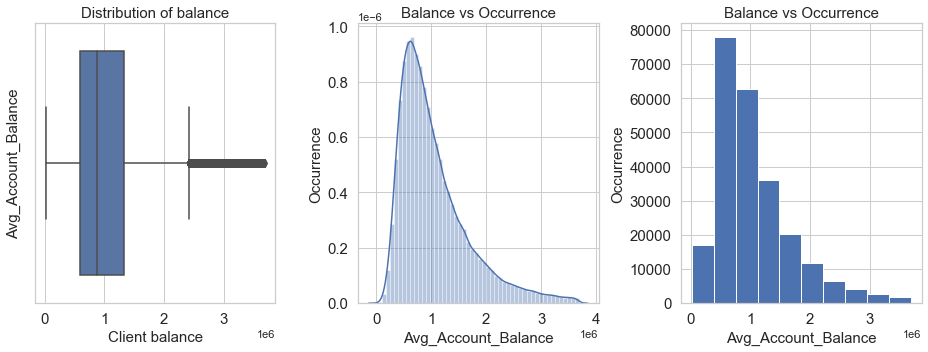

In [28]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='Avg_Account_Balance',data=bank_data,orient='v',ax=ax1)
ax1.set_xlabel('Client balance', fontsize=15)
ax1.set_ylabel('Avg_Account_Balance', fontsize=15)
ax1.set_title('Distribution of balance', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(bank_data['Avg_Account_Balance'],ax=ax2)
ax2.set_xlabel('Avg_Account_Balance', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Balance vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(bank_data['Avg_Account_Balance'])
ax3.set_xlabel('Avg_Account_Balance', fontsize=15)
ax3.set_ylabel('Occurrence', fontsize=15)
ax3.set_title('Balance vs Occurrence', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

### vintage

In [29]:
print('Minimum age: ', bank_data['Vintage'].min())
print('Maximum age: ',bank_data['Vintage'].max())
print('Mean value: ', bank_data['Vintage'].mean())
print('Median value: ',bank_data['Vintage'].median())
print('Standard deviation: ', bank_data['Vintage'].std())
print('Null values: ',bank_data['Vintage'].isnull().any())

Minimum age:  7
Maximum age:  135
Mean value:  46.73267170500789
Median value:  32.0
Standard deviation:  32.23965023818392
Null values:  False


In [30]:
Q1=bank_data['Vintage'].quantile(q=0.25)
Q3=bank_data['Vintage'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)

1st Quartile (Q1) is:  20.0
3st Quartile (Q3) is:  73.0


In [31]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Vintage: ', L_outliers)
print('Upper outliers in Vintage: ', U_outliers)

Lower outliers in Vintage:  -59.5
Upper outliers in Vintage:  152.5


In [32]:
print('Number of outliers in Vintage upper : ', bank_data[bank_data['Vintage']>152.5]['Vintage'].count())
print('Number of outliers in Vintage lower : ', bank_data[bank_data['Vintage']<-59.6]['Vintage'].count())
print('% of Outlier in Vintage upper: ',round(bank_data[bank_data['Vintage']>152.5]['Vintage'].count()*100/len(bank_data)), '%')
print('% of Outlier in Vintage lower: ',round(bank_data[bank_data['Vintage']<-59.5]['Vintage'].count()*100/len(bank_data)), '%')

Number of outliers in Vintage upper :  0
Number of outliers in Vintage lower :  0
% of Outlier in Vintage upper:  0 %
% of Outlier in Vintage lower:  0 %


C:\Users\karulrax\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\karulrax\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


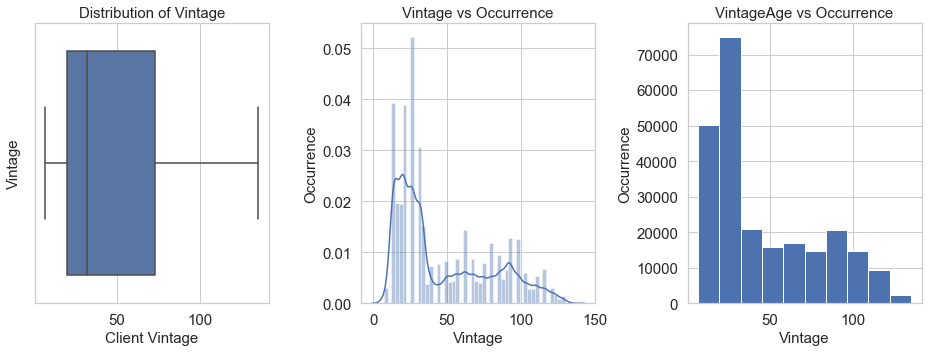

In [33]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='Vintage',data=bank_data,orient='v',ax=ax1)
ax1.set_xlabel('Client Vintage', fontsize=15)
ax1.set_ylabel('Vintage', fontsize=15)
ax1.set_title('Distribution of Vintage', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(bank_data['Vintage'],ax=ax2)
ax2.set_xlabel('Vintage', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Vintage vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(bank_data['Vintage'])
ax3.set_xlabel('Vintage', fontsize=15)
ax3.set_ylabel('Occurrence', fontsize=15)
ax3.set_title('VintageAge vs Occurrence', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

### Region_Code

In [34]:
print('Region_Code: \n', bank_data['Region_Code'].unique())

Region_Code: 
 ['RG268', 'RG277', 'RG270', 'RG282', 'RG261', ..., 'RG263', 'RG250', 'RG255', 'RG253', 'RG271']
Length: 35
Categories (35, object): ['RG268', 'RG277', 'RG270', 'RG282', ..., 'RG250', 'RG255', 'RG253', 'RG271']


In [35]:
bank_data.groupby('Region_Code').size()

Region_Code
RG250     2495
RG251     5911
RG252     4283
RG253     1792
RG254    25942
RG255     2018
RG256     2843
RG257     6040
RG258     1946
RG259     2584
RG260     3103
RG261     7572
RG262     1741
RG263     3670
RG264     2790
RG265     1542
RG266     1572
RG267     1493
RG268    34583
RG269     7756
RG270     7715
RG271     1541
RG272     5238
RG273     4468
RG274     5238
RG275     3244
RG276     2727
RG277    12702
RG278     1810
RG279     3956
RG280    12739
RG281     5090
RG282     5813
RG283    28296
RG284    18567
dtype: int64

C:\Users\karulrax\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


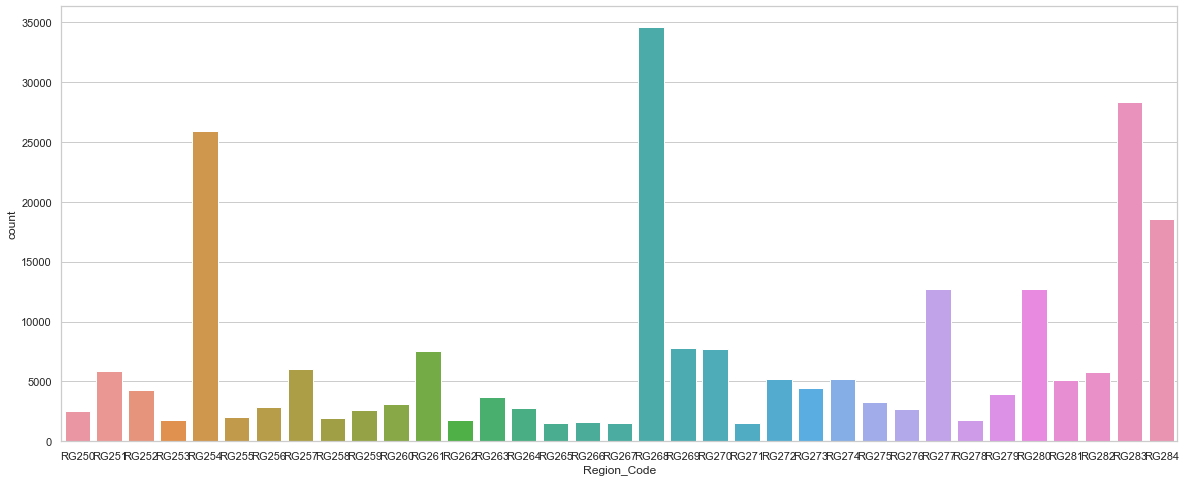

In [36]:
fig, ax=plt.subplots()
fig.set_size_inches(20,8)

#countplot
sns.countplot(bank_data['Region_Code'],data=bank_data)
ax1.set_xlabel('Region_Code', fontsize=18)
ax1.set_ylabel('Count', fontsize=18)
ax1.set_title('Region_Code vs Count', fontsize=18)
ax1.tick_params(labelsize=20)

### Channel_Code

In [37]:
print('Channel_Code: \n', bank_data['Channel_Code'].unique())

Channel_Code: 
 ['X3', 'X1', 'X2', 'X4']
Categories (4, object): ['X3', 'X1', 'X2', 'X4']


In [38]:
bank_data.groupby('Channel_Code').size()

Channel_Code
X1    102049
X2     66383
X3     66886
X4      5502
dtype: int64

C:\Users\karulrax\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


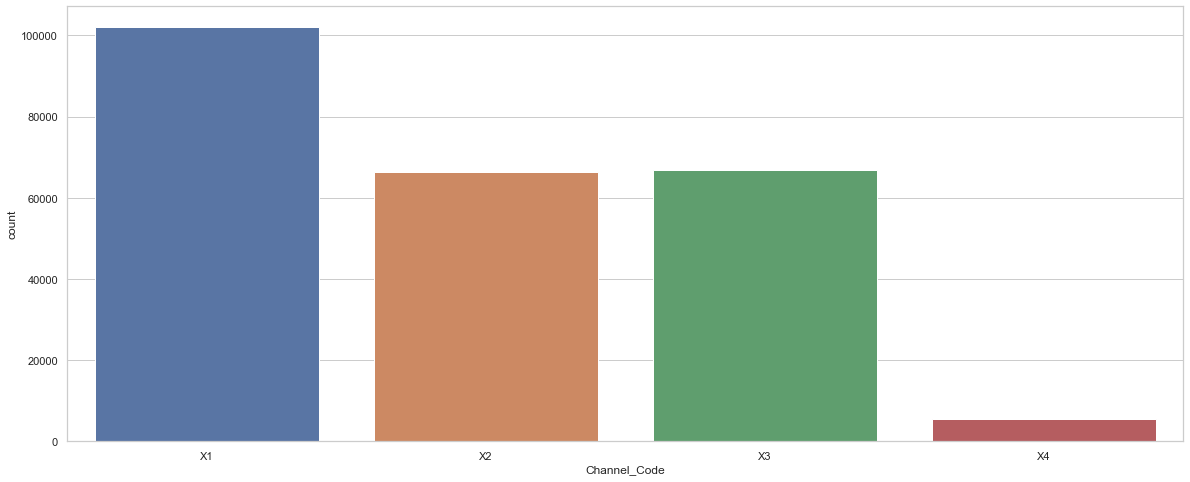

In [39]:
fig, ax=plt.subplots()
fig.set_size_inches(20,8)

#countplot
sns.countplot(bank_data['Channel_Code'],data=bank_data)
ax1.set_xlabel('Channel_Code', fontsize=18)
ax1.set_ylabel('Count', fontsize=18)
ax1.set_title('Channel_Code vs Count', fontsize=18)
ax1.tick_params(labelsize=20)

### Is_Active

In [40]:
print('Is_Active: \n', bank_data['Is_Active'].unique())

Is_Active: 
 ['No', 'Yes']
Categories (2, object): ['No', 'Yes']


In [41]:
bank_data.groupby('Is_Active').size()

Is_Active
No     147705
Yes     93115
dtype: int64

C:\Users\karulrax\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


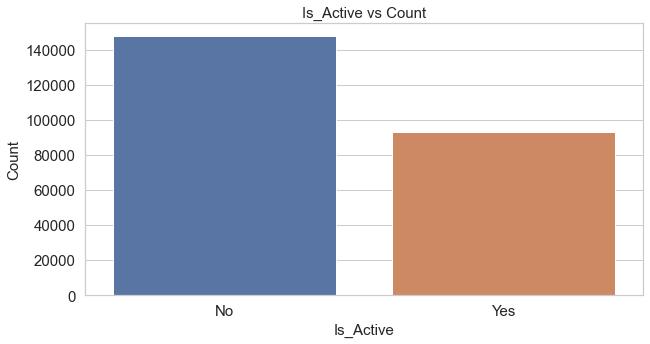

In [42]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(bank_data['Is_Active'],data=bank_data)
ax.set_xlabel('Is_Active', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Is_Active vs Count', fontsize=15)
ax.tick_params(labelsize=15)

### Is_Lead

In [43]:
print('Is_Lead: \n', bank_data['Is_Lead'].unique())

Is_Lead: 
 [0 1]


In [44]:

print(bank_data.groupby('Is_Lead').size())

Is_Lead
0    183802
1     57018
dtype: int64


C:\Users\karulrax\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


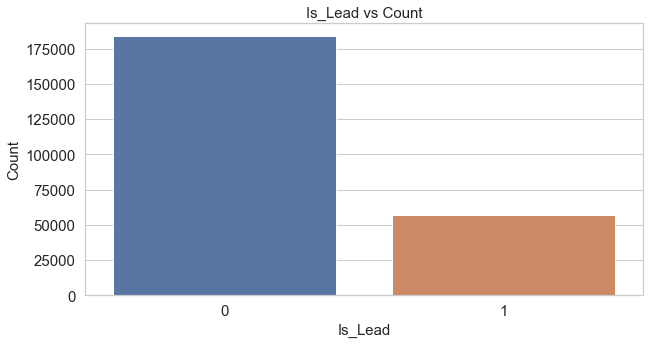

In [45]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(bank_data['Is_Lead'],data=bank_data)
ax.set_xlabel('Is_Lead', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Is_Lead vs Count', fontsize=15)
ax.tick_params(labelsize=15)

# Encode the categorical variables

In [46]:
#drop id and region_code
bank_data = bank_data.drop(['ID','Region_Code'], axis=1)


In [47]:
#Encoding of categorical variables

labelencoder_X=LabelEncoder()

bank_data['Gender']=labelencoder_X.fit_transform(bank_data['Gender'])
bank_data['Occupation']=labelencoder_X.fit_transform(bank_data['Occupation'])
bank_data['Channel_Code']=labelencoder_X.fit_transform(bank_data['Channel_Code'])
bank_data['Credit_Product']=labelencoder_X.fit_transform(bank_data['Credit_Product'])
bank_data['Is_Active']=labelencoder_X.fit_transform(bank_data['Is_Active'])
bank_data.head()

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,1,2,43,0,1045696,0,0
1,0,30,2,0,32,0,581988,0,0
2,0,56,3,2,26,0,1484315,1,0
3,1,34,2,0,19,0,470454,0,0
4,0,30,2,0,33,0,886787,0,0


In [48]:

bank_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,240820.0,5.458932e-01,0.497890,0.0,0.00,1.0,1.0,1.0
Age,240820.0,4.376975e+01,14.790822,23.0,30.00,43.0,54.0,85.0
Occupation,240820.0,2.104642e+00,0.852681,0.0,1.00,2.0,3.0,3.0
Channel_Code,240820.0,8.996803e-01,0.884775,0.0,0.00,1.0,2.0,3.0
Vintage,240820.0,4.673267e+01,32.239650,7.0,20.00,32.0,73.0,135.0
Credit_Product,240820.0,7.041732e-01,0.890740,0.0,0.00,0.0,2.0,2.0
Avg_Account_Balance,240820.0,1.049865e+06,631968.579855,20790.0,598833.75,881082.0,1325726.0,3687136.0
Is_Active,240820.0,3.866581e-01,0.486985,0.0,0.00,0.0,1.0,1.0
Is_Lead,240820.0,2.367660e-01,0.425098,0.0,0.00,0.0,0.0,1.0


# Multivariate Analysis
## Visualization

In [49]:

# corrlation matrix 
cor=bank_data.corr()
cor

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
Gender,1.000000,0.153180,0.032146,0.151606,0.147320,0.065327,0.027684,0.064414,0.072617
Age,0.153180,1.000000,-0.124094,0.606385,0.631409,0.202576,0.165828,0.220417,0.232141
Occupation,0.032146,-0.124094,1.000000,0.126051,0.028667,0.019014,-0.041720,0.078083,0.013489
Channel_Code,0.151606,0.606385,0.126051,1.000000,0.536046,0.259297,0.117060,0.251009,0.262156
Vintage,0.147320,0.631409,0.028667,0.536046,1.000000,0.177698,0.190015,0.209644,0.280006
Credit_Product,0.065327,0.202576,0.019014,0.259297,0.177698,1.000000,0.076146,-0.089325,0.313987
Avg_Account_Balance,0.027684,0.165828,-0.041720,0.117060,0.190015,0.076146,1.000000,0.083349,0.068755
Is_Active,0.064414,0.220417,0.078083,0.251009,0.209644,-0.089325,0.083349,1.000000,0.086364
Is_Lead,0.072617,0.232141,0.013489,0.262156,0.280006,0.313987,0.068755,0.086364,1.000000


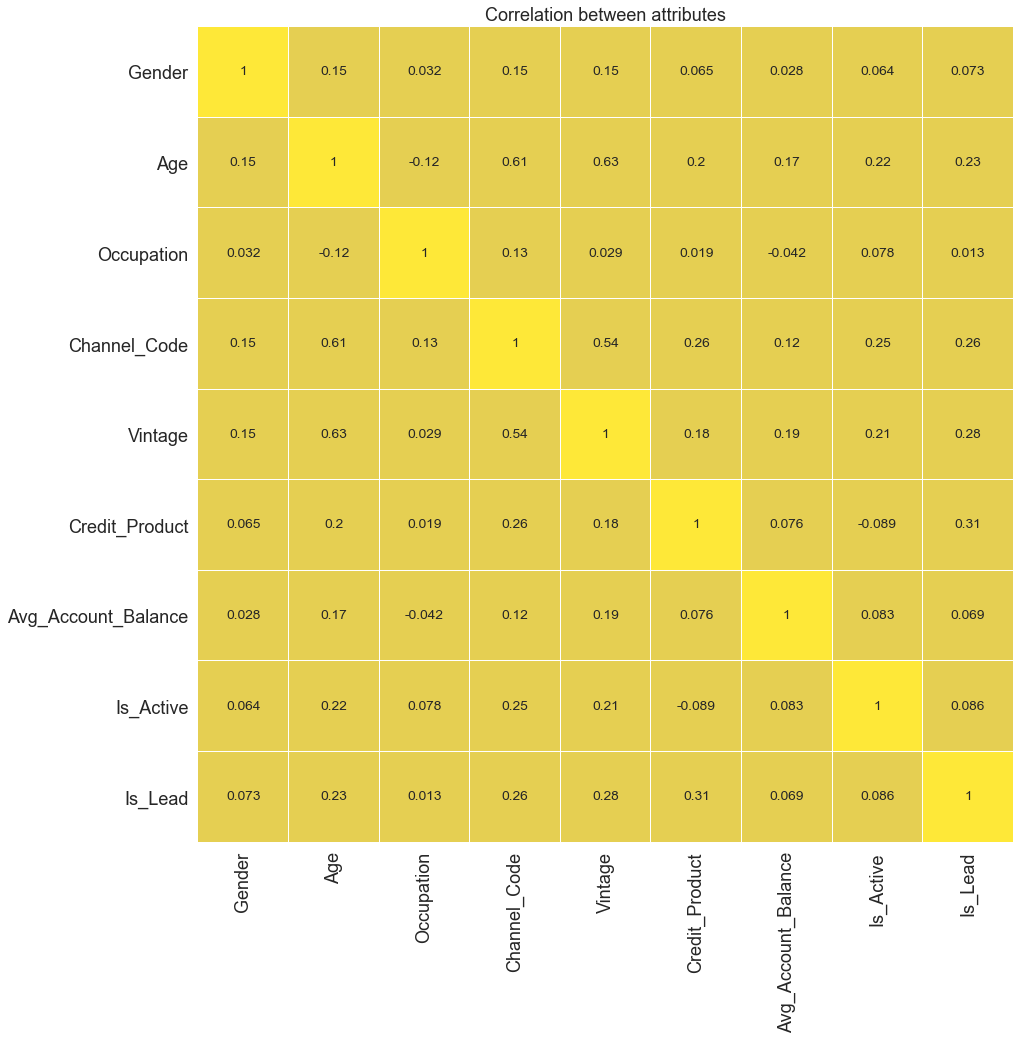

In [50]:
# correlation plot---heatmap
sns.set(font_scale=1.15)
fig,ax=plt.subplots(figsize=(18,15))
sns.heatmap(cor,vmin=0.8,cmap='cividis', annot=True,linewidths=0.01,center=0,linecolor="white",cbar=False,square=True)
plt.title('Correlation between attributes',fontsize=18)
ax.tick_params(labelsize=18)

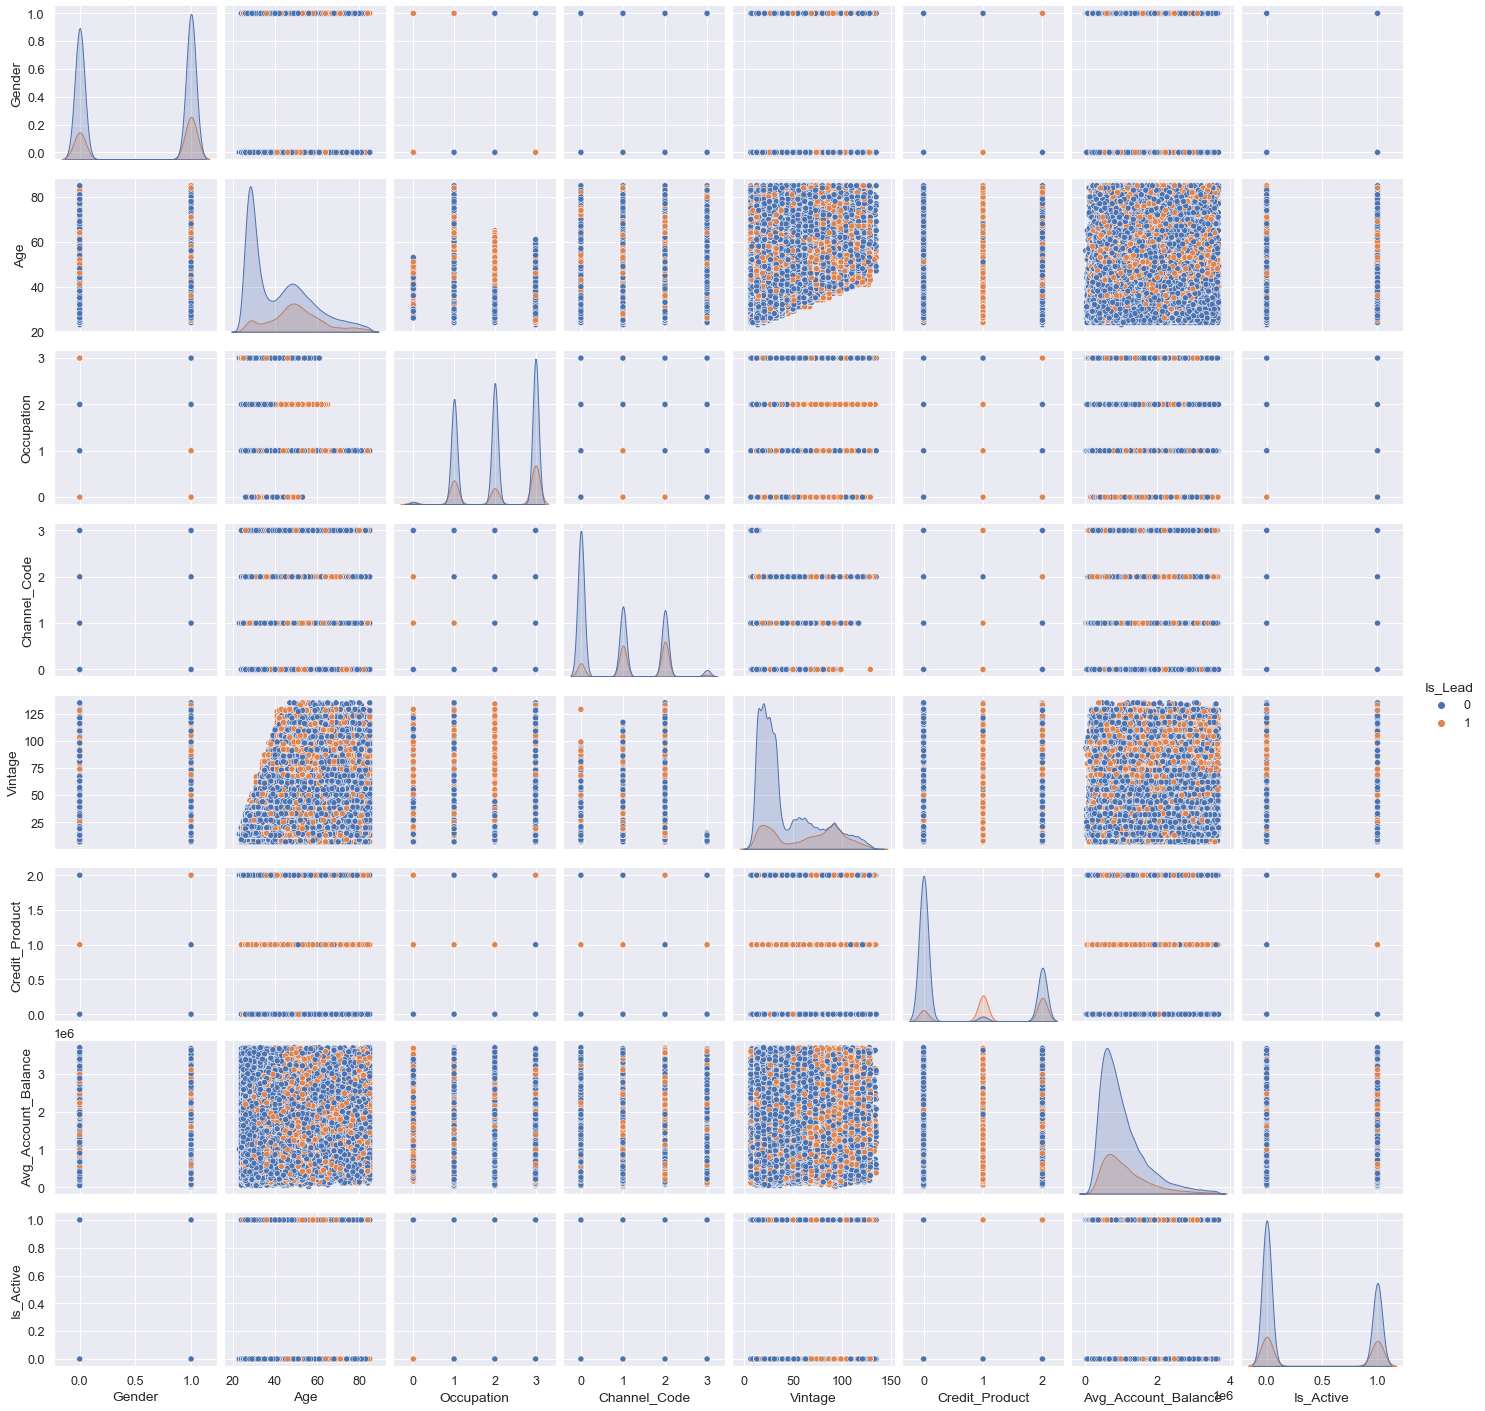

In [51]:
sns.pairplot(bank_data,hue='Is_Lead')

# One Hot Encoder

In [52]:
#HOT ENCODER
#convert to categorical data to dummy data
bank_data = pd.get_dummies(bank_data, columns=["Occupation","Credit_Product","Channel_Code"])
bank_data.head()

,Gender,Age,Vintage,Avg_Account_Balance,Is_Active,Is_Lead,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Credit_Product_0,Credit_Product_1,Credit_Product_2,Channel_Code_0,Channel_Code_1,Channel_Code_2,Channel_Code_3
0,0,73,43,1045696,0,0,0,1,0,0,1,0,0,0,0,1,0
1,0,30,32,581988,0,0,0,0,1,0,1,0,0,1,0,0,0
2,0,56,26,1484315,1,0,0,0,0,1,1,0,0,0,0,1,0
3,1,34,19,470454,0,0,0,0,1,0,1,0,0,1,0,0,0
4,0,30,33,886787,0,0,0,0,1,0,1,0,0,1,0,0,0


# Test Data 

In [53]:
#reading the CSV file into pandas dataframe for testing
credit_test = pd.read_csv(r"C:\Users\karulrax\OneDrive - Intel Corporation\Documents\karthick\Learning\Hackothon\28may2021\test.csv")
credit_test

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No
...,...,...,...,...,...,...,...,...,...,...
105307,DBENJOYI,Male,52,RG268,Salaried,X2,86,Yes,4242558,Yes
105308,CWQ72DWS,Male,55,RG277,Other,X2,86,Yes,1159153,No
105309,HDESC8GU,Male,35,RG254,Salaried,X4,15,No,1703727,No
105310,2PW4SFCA,Male,53,RG254,Other,X3,93,No,737178,Yes


In [54]:
#fill na with others
credit_test.fillna("Others", inplace=True)

In [55]:
print(credit_test.isnull().values.sum())

0


In [56]:
#take a copy of id from dataframe
ids = credit_test["ID"]

In [57]:
#drop id and region_code
credit_test=credit_test.drop(["ID",'Region_Code'],axis =1 )
credit_test.reset_index(drop=True, inplace=True)

In [58]:
#Encoding of categorical variables

labelencoder_X=LabelEncoder()

credit_test['Gender']=labelencoder_X.fit_transform(credit_test['Gender'])
credit_test['Occupation']=labelencoder_X.fit_transform(credit_test['Occupation'])
credit_test['Channel_Code']=labelencoder_X.fit_transform(credit_test['Channel_Code'])
credit_test['Credit_Product']=labelencoder_X.fit_transform(credit_test['Credit_Product'])
credit_test['Is_Active']=labelencoder_X.fit_transform(credit_test['Is_Active'])
credit_test.head()

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,1,29,1,0,25,2,742366,0
1,1,43,1,1,49,1,925537,0
2,1,31,2,0,14,0,215949,0
3,1,29,1,0,33,0,868070,0
4,0,29,1,0,19,0,657087,0


In [59]:
credit_test= pd.get_dummies(credit_test, columns=["Occupation","Credit_Product","Channel_Code"])
credit_test.head()

,Gender,Age,Vintage,Avg_Account_Balance,Is_Active,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Credit_Product_0,Credit_Product_1,Credit_Product_2,Channel_Code_0,Channel_Code_1,Channel_Code_2,Channel_Code_3
0,1,29,25,742366,0,0,1,0,0,0,0,1,1,0,0,0
1,1,43,49,925537,0,0,1,0,0,0,1,0,0,1,0,0
2,1,31,14,215949,0,0,0,1,0,1,0,0,1,0,0,0
3,1,29,33,868070,0,0,1,0,0,1,0,0,1,0,0,0
4,0,29,19,657087,0,0,1,0,0,1,0,0,1,0,0,0


# Model Building: Managing Imbalance the Target column and normalizing the columns

In [60]:
# create training and test data
bank_new=bank_data
X_train=bank_new.loc[:,bank_new.columns!='Is_Lead']
y_train=bank_new.loc[:,bank_new.columns=='Is_Lead']
X_test = credit_test

In [61]:
columns=X_train.columns

## Normalizing/Scaling the Columns

In [62]:
#for normalization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Managing Imbalance classes

In [63]:
bank_data.groupby('Is_Lead').size()

Is_Lead
0    183802
1     57018
dtype: int64

In [64]:
#Import the library for handling the imbalance dataset
from imblearn.over_sampling import SMOTE
Ov_sampling=SMOTE(random_state=100)
# now use SMOTE to oversample our train data which have features data_train_X and labels in data_train_y
ov_data_X,ov_data_y=Ov_sampling.fit_sample(X_train,y_train)
ov_data_X=pd.DataFrame(data=ov_data_X,columns=columns)
ov_data_y=pd.DataFrame(ov_data_y,columns=['Is_Lead'])

In [65]:
print('length of oversampled data is   ',len(ov_data_X))
print('Number of no subscription in oversampled data ' ,len(ov_data_y[ov_data_y['Is_Lead']==0]))
print('Number of subscription ' ,len(ov_data_y[ov_data_y['Is_Lead']==1]))
print('Proportion of no subscription data in oversampled data is ' ,len(ov_data_y[ov_data_y['Is_Lead']==0])/len(ov_data_X))
print('Proportion of subscription data in oversampled data is ' ,len(ov_data_y[ov_data_y['Is_Lead']==1])/len(ov_data_X))

length of oversampled data is    367604
Number of no subscription in oversampled data  183802
Number of subscription  183802
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [66]:
ov_data_y['Is_Lead'].value_counts()

1    183802
0    183802
Name: Is_Lead, dtype: int64

# Model Building

## Decision Tree Model

In [67]:
# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7,random_state=100,min_samples_leaf=5)
reg_dt_model.fit(ov_data_X,ov_data_y)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=5,
                       random_state=100)

In [68]:
y_predict = reg_dt_model.predict(X_test)


## Ensemble Learning - Bagging

In [69]:

from sklearn.ensemble import BaggingClassifier

In [70]:
bgcl_1 = BaggingClassifier(base_estimator=reg_dt_model, n_estimators=100,random_state=100, max_samples = 0.6, max_features = 0.8)
bgcl_1 = bgcl_1.fit(ov_data_X,ov_data_y)

C:\Users\karulrax\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [71]:
bgcl_1_y_predict_1 = bgcl_1.predict(X_test)
bgcl_1_y_predict_1

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

# Export CSV file

In [72]:
#create output csv file
bgcl_1_df1 = pd.DataFrame({"ID" : ids,"Is_Lead" : bgcl_1_y_predict_1 })
bgcl_1_df1 
bgcl_1_df1 .to_csv(r"C:\Users\karulrax\OneDrive - Intel Corporation\Documents\karthick\Learning\Hackothon\28may2021\bgcl_226677321_df1 _Submissions.csv")